In [1]:
import random

# for data, model, training
import pandas as pd
import numpy as np
import tensorflow as tf
import librosa

import matplotlib.pyplot as plt
import seaborn as sns

import basics

# Set the seed value for experiment reproducibility.
seed = 42
random.seed(42)
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
filenames = basics.get_and_shuffle_filenames("./recordings")

print(filenames[:5])

['./recordings/2_jackson_13.wav', './recordings/6_george_34.wav', './recordings/7_george_5.wav', './recordings/1_yweweler_21.wav', './recordings/2_george_42.wav']


In [3]:
X_unfiltered = [(file_path, basics.decode_audio(file_path)) for file_path in filenames]

# to remove outliers 
max_length = basics.get_max_length(X_unfiltered)
print(max_length)

5632


In [4]:
def mel_spec(signal):
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=8000, n_fft=256, hop_length=256)
    print(np.max(mel_spect))
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

In [5]:
X_full = [] # padded X values
y_full = []

numbers = [0] * 10

for file_path, audio in X_unfiltered:
    x_val = audio
    y_val = basics.get_label(file_path)
    
    signal_length = audio.shape[0]
    if signal_length > max_length:
        numbers[y_val] += 1
        continue
        
    x_val = np.pad(
        x_val, (0, max_length - signal_length), 
        'constant', constant_values=(0, 0))

    mel_x = mel_spec(x_val)

    X_full.append(mel_x)
    y_full.append(y_val)

X_full = np.array(X_full)
y_full = np.array(y_full)

num_samples, sample_w, sample_h = X_full.shape
print(num_samples)
print(sample_w, sample_h)

13.486779
11.52056
29.42022
5.1481395
36.216892
35.314648
20.546452
4.748797
10.5596485
23.262945
52.836845
9.782182
7.4157953
27.116024
32.913548
13.902363
41.164524
46.341705
39.22157
5.02381
112.723015
37.5584
52.85056
33.225784
4.8050265
25.452803
24.778082
21.36714
4.3578897
6.4518037
25.029108
26.521246
12.612035
8.496658
12.38928
21.058853
82.085846
41.33462
5.4864483
10.981317
50.530037
5.6669765
18.814651
27.952188
77.33792
15.790362
28.643772
70.94505
28.08116
38.187916
5.7878966
4.9553328
58.57884
73.19775
38.3421
12.560501
8.803194
9.594379
7.413108
32.613277
58.082603
20.411627
30.786156
41.06936
15.626758
17.615164
5.7715645
66.01981
16.923111
4.803453
8.641647
44.15746
79.84061
32.06038
17.112913
9.983556
17.888084
25.059378
5.2100005
1.9682343
29.955996
13.813749
57.919804
8.447158
29.069168
9.603537
32.30326
18.143421
41.66546
15.798693
36.120514
18.958214
4.4959826
41.151928
4.926924
29.347837
29.024979
51.070744
25.238947
6.138651
71.904396
27.172554
3.3784919
7.5254

10.431959
13.391085
17.654144
8.532495
5.3602037
30.583946
6.2773337
36.817554
26.841835
33.79306
26.683622
25.15499
30.27317
18.266184
38.22852
4.7860765
24.993603
10.374531
19.509766
46.540257
8.023966
3.692615
34.19803
17.98809
3.9180024
25.610424
57.126915
19.909231
32.684017
41.934204
18.83592
11.271053
13.953834
19.118244
6.4517727
23.884396
29.952694
70.83991
12.952967
41.154636
16.275534
39.23632
19.811678
4.374579
16.684147
7.6292434
16.92062
8.562227
27.329449
26.874437
14.822373
18.454866
4.880903
3.2548776
10.55802
38.03131
20.819271
49.43636
23.621897
11.102658
12.176604
13.248468
10.790314
2.7953691
13.944006
46.940742
20.75162
4.5745263
17.01856
4.900529
31.956287
23.330563
3.6940262
24.249672
40.80594
41.457817
27.020918
4.2624464
11.895739
7.8248887
30.824484
35.456352
17.7612
14.3489065
21.201157
3.0570433
16.490023
11.120703
4.342601
10.719656
13.922652
6.936585
22.957287
6.001406
50.208057
6.9179244
4.574593
53.26229
28.542913
15.229944
8.264834
33.64648
13.455446
6

5.9154043
14.188788
14.394192
10.990911
24.331612
6.6852937
16.203764
20.832651
43.319405
27.911198
3.3622565
36.89403
3.2343235
35.849422
9.541315
5.4298177
23.198332
45.090332
67.3972
17.579252
17.75383
41.65563
6.205395
71.68283
29.507824
18.62868
47.461468
19.17511
9.2945
7.7744584
14.615323
12.118718
31.51841
24.22587
18.799414
10.265318
7.7835293
27.81407
21.190697
95.836555
4.925264
8.635875
23.572952
6.101218
12.951186
18.816175
5.125606
6.2695575
61.3384
10.987258
16.0118
38.2457
58.232735
13.734942
4.6781507
19.121948
6.6139464
18.733137
40.59794
12.786743
17.137709
50.24661
16.201708
38.24678
14.910347
10.998876
53.803425
7.44048
16.094961
14.889064
9.919499
53.1152
14.308572
9.274965
5.24021
21.245491
9.3304615
12.178473
6.838537
11.906868
13.218967
41.272324
2.8894873
43.74389
8.893475
8.816622
11.9865
41.259834
7.760284
8.79947
45.185467
9.371484
93.49655
15.10924
17.39022
5.136112
8.872704
37.17286
13.916912
12.155367
5.8940516
5.0588913
13.688206
57.906876
8.306637
13.2

7.4341416
22.150297
23.62658
29.957918
18.566109
2.5507753
32.643913
5.394578
28.787716
11.596398
20.034725
17.587431
11.146233
20.241793
5.426924
33.71119
20.411955
12.630214
61.77175
15.125365
9.622555
9.758306
22.011934
31.488136
10.645738
38.340702
36.835876
18.689623
24.914516
24.755217
4.52976
20.66944
34.914665
6.2688475
31.999601
63.56201
13.926152
11.033825
43.401577
20.733341
43.976574
36.372074
35.20013
7.4277124
20.23819
7.1866746
7.8341594
20.736515
23.557405
34.540455
23.438133
31.54771
37.999004
23.22715
6.3271337
5.7679734
41.224308
15.518166
25.314396
9.826447
26.014517
46.435833
59.840702
61.975845
46.933857
48.492382
2.0844536
29.823187
12.7912445
41.46682
4.740099
11.528339
30.39613
3.4413636
12.255649
19.918901
3.0570498
9.90651
9.3404665
45.154068
7.376301
21.268587
6.0629787
65.53654
13.014157
11.635795
36.189346
8.849579
22.290915
21.694483
46.408722
42.06723
72.07209
7.6220512
21.782267
20.6812
23.721272
30.14478
32.422287
3.8690617
22.497435
25.984861
24.38353

In [6]:
# dropped outliers
df = pd.DataFrame.from_dict({"quantities": numbers})
print(df)
print(sum(numbers))

   quantities
0          12
1           9
2           7
3           9
4           3
5           8
6          29
7          11
8           6
9          10
104


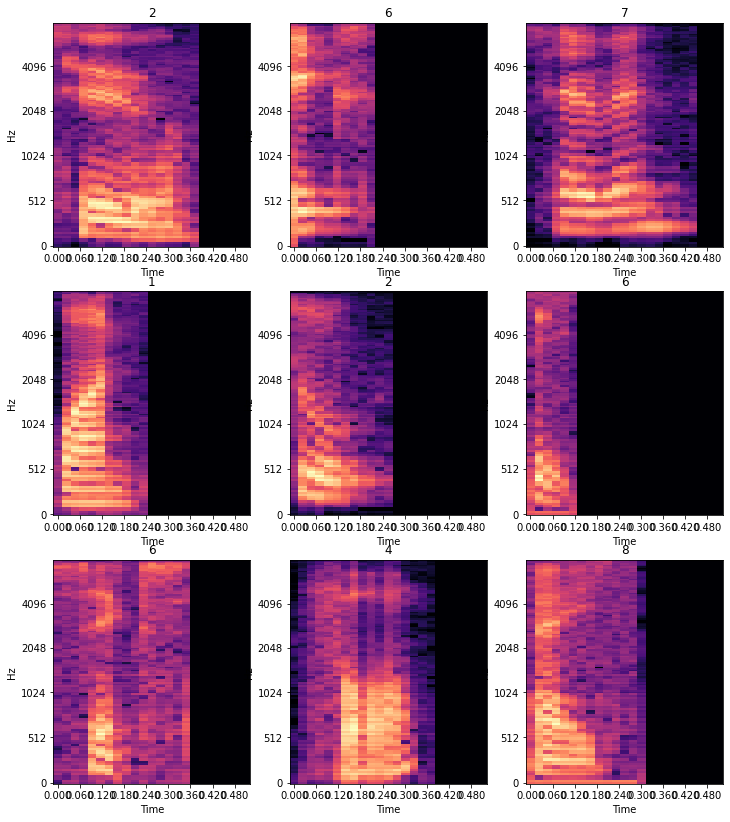

In [7]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 14))

for i, (audio, label) in enumerate(list(zip(X_full, y_full))[:n]):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    
    librosa.display.specshow(audio, 
                             y_axis='mel', 
                             fmax=8000, x_axis='time', ax=axes[r][c]);
    ax.set_title(label)

plt.show()

In [8]:
# normalize data
X_full = basics.normalize_arr(X_full)

# partition into 80:10:10
partitions = basics.split_full(X_full, y_full)

X_train, y_train = partitions[0]
X_val, y_val = partitions[1]
X_test, y_test = partitions[2]

print('Training set size', len(X_train))
print('Validation set size', len(X_val))
print('Test set size', len(X_test))

Training set size 2312
Validation set size 289
Test set size 295


In [9]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(data=X_full)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(sample_w, sample_h, 1)))
model.add(tf.keras.layers.Resizing(32, 32))
model.add(norm_layer)
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.build()
model.summary()

2022-05-09 15:40:46.050871: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 23)       47        
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        6656      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_val, y_val))

Epoch 1/30
73/73 [==============================] - 7s 87ms/step - loss: 3.6302 - accuracy: 0.1600 - val_loss: 1.9996 - val_accuracy: 0.3702
Epoch 2/30
73/73 [==============================] - 6s 82ms/step - loss: 1.8889 - accuracy: 0.3123 - val_loss: 1.4003 - val_accuracy: 0.6367
Epoch 3/30
73/73 [==============================] - 6s 82ms/step - loss: 1.2315 - accuracy: 0.5653 - val_loss: 0.6150 - val_accuracy: 0.7993
Epoch 4/30
73/73 [==============================] - 5s 71ms/step - loss: 0.8632 - accuracy: 0.7067 - val_loss: 0.4010 - val_accuracy: 0.8962
Epoch 5/30
73/73 [==============================] - 5s 69ms/step - loss: 0.6574 - accuracy: 0.7738 - val_loss: 0.2853 - val_accuracy: 0.9135
Epoch 6/30
73/73 [==============================] - 6s 76ms/step - loss: 0.5742 - accuracy: 0.7976 - val_loss: 0.2289 - val_accuracy: 0.9481
Epoch 7/30
73/73 [==============================] - 6s 77ms/step - loss: 0.4359 - accuracy: 0.8516 - val_loss: 0.2625 - val_accuracy: 0.9170
Epoch 8/30
73

In [12]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 13ms/step - loss: 0.1253 - accuracy: 0.9559


[0.12528124451637268, 0.9559321999549866]

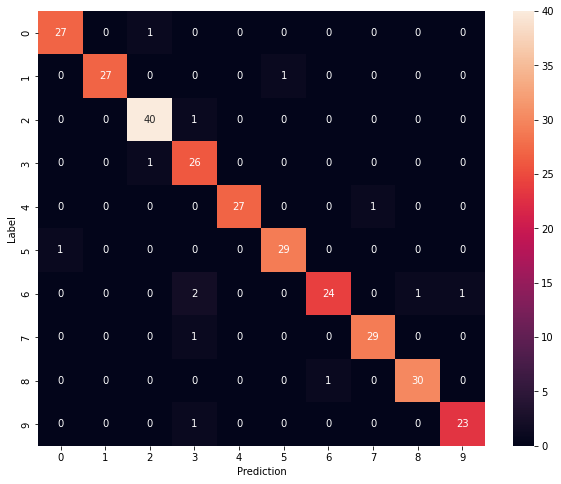

In [13]:
y_pred = np.argmax(model.predict(X_test), axis=1)

all_labels = list(range(10))

confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=all_labels,
            yticklabels=all_labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [14]:
# model.save("model_v2.h5")